In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

df = pd.read_csv("StudentsPerformance.csv")  

print(df.head(5))
print(df.info())
print(df.describe())
print(df.columns)


   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


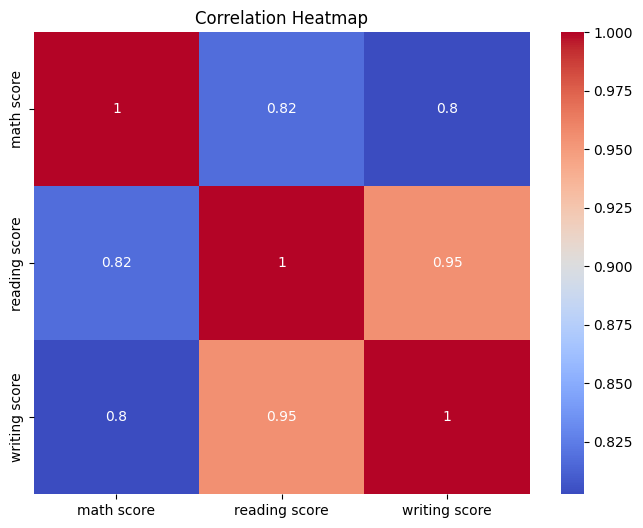

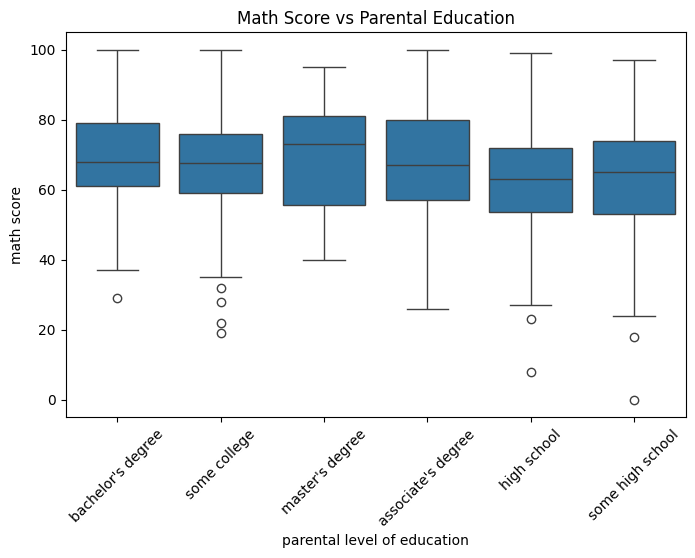

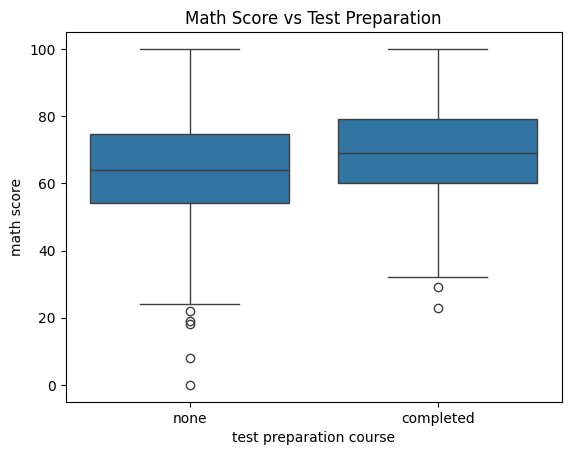

In [ ]:
print("Missing values:\n", df.isnull().sum())

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='parental level of education', y='math score', data=df)
plt.xticks(rotation=45)
plt.title("Math Score vs Parental Education")
plt.show()

sns.boxplot(x='test preparation course', y='math score', data=df)
plt.title("Math Score vs Test Preparation")
plt.show()


In [10]:
categorical_features = ['parental level of education', 'test preparation course']
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), categorical_features)],
    remainder='passthrough' 
)

X_encoded = ct.fit_transform(X)

print("Encoding complete!")
print("Encoded feature array shape:", X_encoded.shape)
print("First 5 rows after encoding:\n", X_encoded[:5])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

print("Data split complete!")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Encoding complete!
Encoded feature array shape: (1000, 6)
First 5 rows after encoding:
 <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 8 stored elements and shape (5, 6)>
  Coords	Values
  (0, 0)	1.0
  (0, 5)	1.0
  (1, 3)	1.0
  (2, 2)	1.0
  (2, 5)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (4, 5)	1.0
Data split complete!
X_train shape: (800, 6)
X_test shape: (200, 6)
y_train shape: (800,)
y_test shape: (200,)


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print("Model trained successfully!")
print("R² Score:", r2)
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)


Model trained successfully!
R² Score: 0.026708420448000925
Intercept: 71.49368370488033
Coefficients: [ 2.65466069 -4.47076897  0.28290227  0.0460973  -3.50111011 -5.91934003]


In [8]:
sample = pd.DataFrame({
    'parental level of education': ['bachelor\'s degree'],
    'test preparation course': ['completed']
})

sample_encoded = ct.transform(sample)
predicted_score = model.predict(sample_encoded)

print("Predicted Math Score for given student:", predicted_score[0])


Predicted Math Score for given student: 74.1483443932283


Feature influence on math score:
                                             Feature  Coefficient
5              encoder__test preparation course_none    -5.919340
1   encoder__parental level of education_high school    -4.470769
4  encoder__parental level of education_some high...    -3.501110
0  encoder__parental level of education_bachelor'...     2.654661
2  encoder__parental level of education_master's ...     0.282902
3  encoder__parental level of education_some college     0.046097


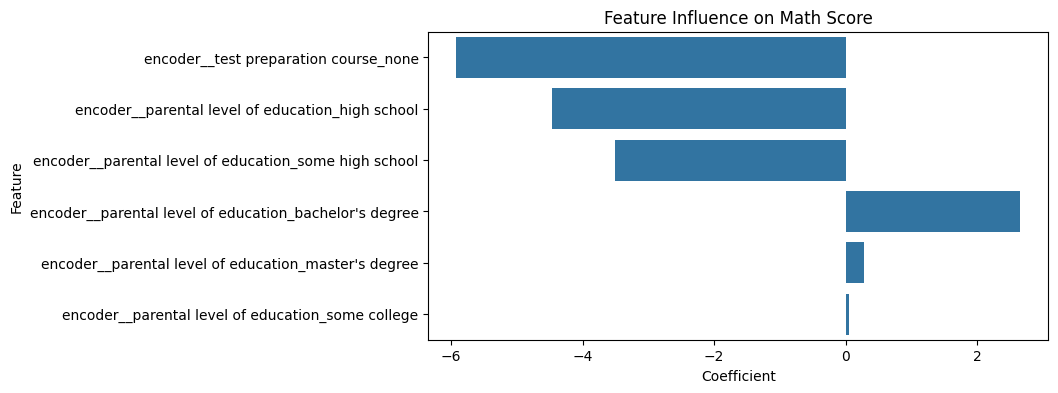

In [9]:
encoded_feature_names = ct.get_feature_names_out()

coef_df = pd.DataFrame({
    'Feature': encoded_feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Feature influence on math score:")
print(coef_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,4))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title("Feature Influence on Math Score")
plt.show()